In [1]:

from astropy.table import Table, join
from astropy.cosmology import Planck18 as cosmo
from matplotlib import pyplot as plt
from tqdm import tqdm
from copy import deepcopy
from scipy.optimize import minimize
from scipy.special import erfc

import numpy as np
import matplotlib.colors as colors
import sncosmo
import lcdata

import parsnip



In [2]:
model = parsnip.load_model('../parsnip-mod/models/model_roman_full.pt')
roman_classifier = parsnip.Classifier()
dataset = lcdata.read_hdf5('roman_test.h5')
preds = model.predict_dataset(dataset, augment=True)

/home/belal/anaconda3/envs/shakinaz/lib/python3.10/site-packages/parsnip/parsnip.py:299: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:230.)
  self.band_interpolate_weights = torch.FloatTensor(band_weights).to(self.device)


Preprocessing dataset: 100%|██████████| 5985/5985 [00:05<00:00, 1154.06it/s]
Length (128,) for reference_time
Length (128,) for reference_time_error
Length (128,) for color
Length (128,) for color_error
Length (128,) for amplitude
Length (128,) for amplitude_error
Length (128,) for s1
Length (128,) for s1_error
Length (128,) for s2
Length (128,) for s2_error
Length (128,) for s3
Length (128,) for s3_error
Length (128,) for total_s2n
Length (128,) for count
Length (128,) for count_s2n_3
Length (128,) for count_s2n_5
Length (128,) for count_s2n_3_pre
Length (128,) for count_s2n_3_rise
Length (128,) for count_s2n_3_fall
Length (128,) for count_s2n_3_post
Length (128,) for model_chisq
Length (128,) for model_dof
22
1
Length (128,) for reference_time
Length (128,) for reference_time_error
Length (128,) for color
Length (128,) for color_error
Length (128,) for amplitude
Length (128,) for amplitude_error
Length (128,) for s1
Length (128,) for s1_error
Length (128,) for s2
Length (128,) for s2

In [3]:
"""dropped_types = ['ILOT', 'PISNb', 'TDE', 'SLSN']
mask = ~np.isin(preds['type'],dropped_types)

# Apply the mask to the table
preds_fl = preds[mask]"""

roman_plot_labels = ["SNIa",
"91bg-like",
"SNIax",
"CCSN",
"SLSN",
"ILOT",
"TDE",
"PISNb"]
preds['original_object_id'] = preds['object_id']

In [4]:
roman_train = lcdata.read_hdf5('roman_train.h5')
pred_train = model.predict_dataset(roman_train)

Preprocessing dataset: 100%|██████████| 60000/60000 [00:51<00:00, 1157.34it/s]
Length (128,) for reference_time
Length (128,) for reference_time_error
Length (128,) for color
Length (128,) for color_error
Length (128,) for amplitude
Length (128,) for amplitude_error
Length (128,) for s1
Length (128,) for s1_error
Length (128,) for s2
Length (128,) for s2_error
Length (128,) for s3
Length (128,) for s3_error
Length (128,) for total_s2n
Length (128,) for count
Length (128,) for count_s2n_3
Length (128,) for count_s2n_5
Length (128,) for count_s2n_3_pre
Length (128,) for count_s2n_3_rise
Length (128,) for count_s2n_3_fall
Length (128,) for count_s2n_3_post
Length (128,) for model_chisq
Length (128,) for model_dof
22
1
Length (128,) for reference_time
Length (128,) for reference_time_error
Length (128,) for color
Length (128,) for color_error
Length (128,) for amplitude
Length (128,) for amplitude_error
Length (128,) for s1
Length (128,) for s1_error
Length (128,) for s2
Length (128,) for 

In [16]:
roman_classifier = parsnip.Classifier()
pred_train['original_object_id'] = pred_train['object_id']
classifications_train = roman_classifier.train(pred_train, num_folds=10, target_label = 'SNIa')


Training classifier with keys:
    color
    color_error
    s1
    s1_error
    s2
    s2_error
    s3
    s3_error
    luminosity
    luminosity_error
    reference_time_error
Label distribution before folding: (array([0, 1]), array([15731, 44269]))


/home/belal/anaconda3/envs/shakinaz/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's binary_logloss: 0.174047
[100]	valid_0's binary_logloss: 0.177017


/home/belal/anaconda3/envs/shakinaz/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
/home/belal/anaconda3/envs/shakinaz/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's binary_logloss: 0.192754


/home/belal/anaconda3/envs/shakinaz/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's binary_logloss: 0.182074


/home/belal/anaconda3/envs/shakinaz/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
/home/belal/anaconda3/envs/shakinaz/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's binary_logloss: 0.178887
[100]	valid_0's binary_logloss: 0.182398


/home/belal/anaconda3/envs/shakinaz/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's binary_logloss: 0.178061


/home/belal/anaconda3/envs/shakinaz/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's binary_logloss: 0.192993


/home/belal/anaconda3/envs/shakinaz/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's binary_logloss: 0.182371


/home/belal/anaconda3/envs/shakinaz/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's binary_logloss: 0.170808


In [17]:
classifications = roman_classifier.classify(preds)

Macro averaged completeness (Villar et al. 2020): 0.9225
Fraction correct: 0.9180


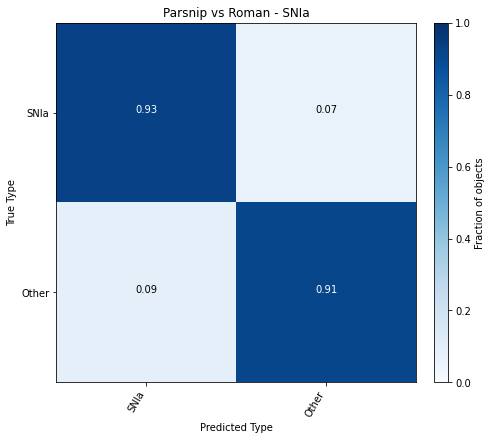

In [18]:
parsnip.plot_confusion_matrix(preds, classifications, title = 'Parsnip vs Roman - SNIa', figsize=(8,6))
plt.savefig('confustion_matrix_ps_roman_SNIa.pdf')

In [6]:
pred_test = model.predict_dataset(dataset)

Preprocessing dataset: 100%|██████████| 5985/5985 [00:05<00:00, 1006.84it/s]
Length (128,) for reference_time
Length (128,) for reference_time_error
Length (128,) for color
Length (128,) for color_error
Length (128,) for amplitude
Length (128,) for amplitude_error
Length (128,) for s1
Length (128,) for s1_error
Length (128,) for s2
Length (128,) for s2_error
Length (128,) for s3
Length (128,) for s3_error
Length (128,) for total_s2n
Length (128,) for count
Length (128,) for count_s2n_3
Length (128,) for count_s2n_5
Length (128,) for count_s2n_3_pre
Length (128,) for count_s2n_3_rise
Length (128,) for count_s2n_3_fall
Length (128,) for count_s2n_3_post
Length (128,) for model_chisq
Length (128,) for model_dof
22
1
Length (128,) for reference_time
Length (128,) for reference_time_error
Length (128,) for color
Length (128,) for color_error
Length (128,) for amplitude
Length (128,) for amplitude_error
Length (128,) for s1
Length (128,) for s1_error
Length (128,) for s2
Length (128,) for s2

Training classifier with keys:
    color
    color_error
    s1
    s1_error
    s2
    s2_error
    s3
    s3_error
    luminosity
    luminosity_error
    reference_time_error
Label distribution before folding: (array([0, 1]), array([    9, 59991]))


/home/belal/anaconda3/envs/shakinaz/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(
/home/belal/anaconda3/envs/shakinaz/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's binary_logloss: 0.0452082
[100]	valid_0's binary_logloss: 0.03509


/home/belal/anaconda3/envs/shakinaz/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
/home/belal/anaconda3/envs/shakinaz/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's binary_logloss: 0.743863
[100]	valid_0's binary_logloss: 0.0374724


/home/belal/anaconda3/envs/shakinaz/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
/home/belal/anaconda3/envs/shakinaz/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's binary_logloss: 0.0319955
[100]	valid_0's binary_logloss: 0.879142


/home/belal/anaconda3/envs/shakinaz/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
/home/belal/anaconda3/envs/shakinaz/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's binary_logloss: 0.832232
[100]	valid_0's binary_logloss: 0.034767


/home/belal/anaconda3/envs/shakinaz/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
/home/belal/anaconda3/envs/shakinaz/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's binary_logloss: 0.422972
[100]	valid_0's binary_logloss: 0.0560767
Macro averaged completeness (Villar et al. 2020): 0.7477
Fraction correct: 0.9952


/home/belal/anaconda3/envs/shakinaz/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


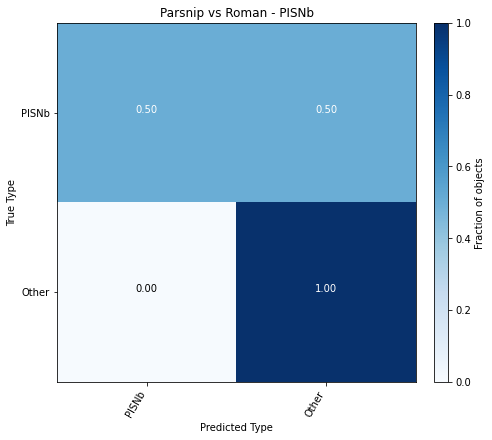

In [33]:
roman_classifier = parsnip.Classifier()
pred_train['original_object_id'] = pred_train['object_id']
classifications_train = roman_classifier.train(pred_train, num_folds=10, target_label = 'PISNb')
preds_copy = pred_test.copy()
classifications = roman_classifier.classify(preds_copy)
parsnip.plot_confusion_matrix(preds_copy, classifications, title = 'Parsnip vs Roman - PISNb', figsize=(8,6))
plt.savefig('confustion_matrix_ps_roman_PISNb.pdf')

Training classifier with keys:
    color
    color_error
    s1
    s1_error
    s2
    s2_error
    s3
    s3_error
    luminosity
    luminosity_error
    reference_time_error
Label distribution before folding: (array([0, 1]), array([15731, 44269]))


/home/belal/anaconda3/envs/shakinaz/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's binary_logloss: 0.174047
[100]	valid_0's binary_logloss: 0.177017


/home/belal/anaconda3/envs/shakinaz/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
/home/belal/anaconda3/envs/shakinaz/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's binary_logloss: 0.192754


/home/belal/anaconda3/envs/shakinaz/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's binary_logloss: 0.182074


/home/belal/anaconda3/envs/shakinaz/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's binary_logloss: 0.178887


/home/belal/anaconda3/envs/shakinaz/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's binary_logloss: 0.182398
[100]	valid_0's binary_logloss: 0.178061


/home/belal/anaconda3/envs/shakinaz/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
/home/belal/anaconda3/envs/shakinaz/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's binary_logloss: 0.192993


/home/belal/anaconda3/envs/shakinaz/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's binary_logloss: 0.182371


/home/belal/anaconda3/envs/shakinaz/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's binary_logloss: 0.170808


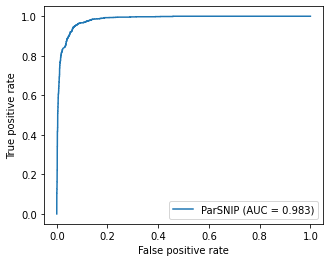

In [41]:
# Show the ROC curve for SN Ia classification
from sklearn.metrics import roc_curve, auc

target = 'SNIa'

roman_classifier = parsnip.Classifier()
pred_train['original_object_id'] = pred_train['object_id']
classifications_train = roman_classifier.train(pred_train, num_folds=10, target_label = target)
preds_copy = pred_test.copy()
classifications = roman_classifier.classify(preds_copy)


plt.figure(figsize=(5, 4))


fpr1, tpr1, thresholds = roc_curve(pred_test['type'] == target, classifications[target])
plt.plot(fpr1, tpr1, label=f'ParSNIP (AUC = {auc(fpr1, tpr1):.3f})')

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

plt.title(f'AUC for {target} classifications')
plt.legend()

plt.savefig('./figures/ps_roman_snia_roc.pdf')


In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(pred_train = pred_train, pred_test = pred_test, target = 'SNIa', classifier = roman_classifier, save_path='./figures/'):
    """
    Plots the ROC curve for a given target classification and saves the figure.

    Parameters:
    pred_train (DataFrame): Training data with features and labels
    pred_test (DataFrame): Test data with features
    target (str): The target label for classification
    classifier (Classifier): The classifier object with train and classify methods
    save_path (str): Path to save the ROC curve plot
    """
    pred_train['original_object_id'] = pred_train['object_id']
    classifications_train = classifier.train(pred_train, num_folds=10, target_label=target)
    preds_copy = pred_test.copy()
    classifications = classifier.classify(preds_copy)
    
    plt.figure(figsize=(5, 4))
    
    fpr, tpr, thresholds = roc_curve(pred_test['type'] == target, classifications[target])
    plt.plot(fpr, tpr, label=f'{classifier.__class__.__name__} (AUC = {auc(fpr, tpr):.3f})')
    
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.xscale('log')
    plt.title(f'AUC for {target} classifications')
    plt.legend()
    
    save_file = f'{save_path}{classifier.__class__.__name__.lower()}_{target.lower()}_roc_log.pdf'
    plt.savefig(save_file)
    plt.close()
    print(f'ROC curve saved to {save_file}')

# Example usage:
#plot_roc_curve(pred_train, pred_test, 'SNIa', roman_classifier)

In [13]:
for type in roman_plot_labels:
    plot_roc_curve(target=type)

Training classifier with keys:
    color
    color_error
    s1
    s1_error
    s2
    s2_error
    s3
    s3_error
    luminosity
    luminosity_error
    reference_time_error
Label distribution before folding: (array([0, 1]), array([15731, 44269]))


/home/belal/anaconda3/envs/shakinaz/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
/home/belal/anaconda3/envs/shakinaz/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's binary_logloss: 0.174047
[100]	valid_0's binary_logloss: 0.177017


/home/belal/anaconda3/envs/shakinaz/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
/home/belal/anaconda3/envs/shakinaz/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's binary_logloss: 0.192754
[100]	valid_0's binary_logloss: 0.182074


/home/belal/anaconda3/envs/shakinaz/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
/home/belal/anaconda3/envs/shakinaz/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's binary_logloss: 0.178887
[100]	valid_0's binary_logloss: 0.182398


/home/belal/anaconda3/envs/shakinaz/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
/home/belal/anaconda3/envs/shakinaz/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's binary_logloss: 0.178061
[100]	valid_0's binary_logloss: 0.192993


/home/belal/anaconda3/envs/shakinaz/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
/home/belal/anaconda3/envs/shakinaz/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's binary_logloss: 0.182371
[100]	valid_0's binary_logloss: 0.170808
ROC curve saved to ./figures/classifier_snia_roc_log.pdf
Training classifier with keys:
    color
    color_error
    s1
    s1_error
    s2
    s2_error
    s3
    s3_error
    luminosity
    luminosity_error
    reference_time_error
Label distribution before folding: (array([0, 1]), array([ 1100, 58900]))


/home/belal/anaconda3/envs/shakinaz/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
/home/belal/anaconda3/envs/shakinaz/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's binary_logloss: 0.180898
[100]	valid_0's binary_logloss: 0.121


/home/belal/anaconda3/envs/shakinaz/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
/home/belal/anaconda3/envs/shakinaz/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's binary_logloss: 0.159183
[100]	valid_0's binary_logloss: 0.152108


/home/belal/anaconda3/envs/shakinaz/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
/home/belal/anaconda3/envs/shakinaz/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's binary_logloss: 0.189343
[100]	valid_0's binary_logloss: 0.186462


/home/belal/anaconda3/envs/shakinaz/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
/home/belal/anaconda3/envs/shakinaz/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's binary_logloss: 0.1565
[100]	valid_0's binary_logloss: 0.180992


/home/belal/anaconda3/envs/shakinaz/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
/home/belal/anaconda3/envs/shakinaz/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's binary_logloss: 0.134069
[100]	valid_0's binary_logloss: 0.15461
ROC curve saved to ./figures/classifier_91bg-like_roc_log.pdf
Training classifier with keys:
    color
    color_error
    s1
    s1_error
    s2
    s2_error
    s3
    s3_error
    luminosity
    luminosity_error
    reference_time_error
Label distribution before folding: (array([0, 1]), array([  832, 59168]))


/home/belal/anaconda3/envs/shakinaz/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's binary_logloss: 0.263338


/home/belal/anaconda3/envs/shakinaz/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's binary_logloss: 0.283922


/home/belal/anaconda3/envs/shakinaz/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's binary_logloss: 0.300336


/home/belal/anaconda3/envs/shakinaz/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's binary_logloss: 0.299918


/home/belal/anaconda3/envs/shakinaz/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's binary_logloss: 0.263943
[100]	valid_0's binary_logloss: 0.283285


/home/belal/anaconda3/envs/shakinaz/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
/home/belal/anaconda3/envs/shakinaz/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's binary_logloss: 0.318517


/home/belal/anaconda3/envs/shakinaz/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's binary_logloss: 0.283339


/home/belal/anaconda3/envs/shakinaz/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's binary_logloss: 0.25376


/home/belal/anaconda3/envs/shakinaz/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's binary_logloss: 0.335946
ROC curve saved to ./figures/classifier_sniax_roc_log.pdf
Training classifier with keys:
    color
    color_error
    s1
    s1_error
    s2
    s2_error
    s3
    s3_error
    luminosity
    luminosity_error
    reference_time_error
Label distribution before folding: (array([0, 1]), array([42195, 17805]))


/home/belal/anaconda3/envs/shakinaz/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's binary_logloss: 0.222823


/home/belal/anaconda3/envs/shakinaz/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's binary_logloss: 0.222808
[100]	valid_0's binary_logloss: 0.208547


/home/belal/anaconda3/envs/shakinaz/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
/home/belal/anaconda3/envs/shakinaz/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's binary_logloss: 0.220497


/home/belal/anaconda3/envs/shakinaz/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's binary_logloss: 0.218717


/home/belal/anaconda3/envs/shakinaz/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's binary_logloss: 0.220909


/home/belal/anaconda3/envs/shakinaz/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's binary_logloss: 0.226435


/home/belal/anaconda3/envs/shakinaz/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's binary_logloss: 0.220848


/home/belal/anaconda3/envs/shakinaz/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's binary_logloss: 0.236292


/home/belal/anaconda3/envs/shakinaz/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's binary_logloss: 0.218187
ROC curve saved to ./figures/classifier_ccsn_roc_log.pdf
Training classifier with keys:
    color
    color_error
    s1
    s1_error
    s2
    s2_error
    s3
    s3_error
    luminosity
    luminosity_error
    reference_time_error
Label distribution before folding: (array([0, 1]), array([   65, 59935]))


/home/belal/anaconda3/envs/shakinaz/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
/home/belal/anaconda3/envs/shakinaz/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's binary_logloss: 0.603114
[100]	valid_0's binary_logloss: 0.220491


/home/belal/anaconda3/envs/shakinaz/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
/home/belal/anaconda3/envs/shakinaz/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's binary_logloss: 0.442489
[100]	valid_0's binary_logloss: 0.201966


/home/belal/anaconda3/envs/shakinaz/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
/home/belal/anaconda3/envs/shakinaz/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's binary_logloss: 0.219302
[100]	valid_0's binary_logloss: 0.0960166


/home/belal/anaconda3/envs/shakinaz/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
/home/belal/anaconda3/envs/shakinaz/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's binary_logloss: 0.151815
[100]	valid_0's binary_logloss: 0.104765


/home/belal/anaconda3/envs/shakinaz/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
/home/belal/anaconda3/envs/shakinaz/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's binary_logloss: 0.176623
[100]	valid_0's binary_logloss: 0.371725
ROC curve saved to ./figures/classifier_slsn_roc_log.pdf
Training classifier with keys:
    color
    color_error
    s1
    s1_error
    s2
    s2_error
    s3
    s3_error
    luminosity
    luminosity_error
    reference_time_error
Label distribution before folding: (array([0, 1]), array([   32, 59968]))


/home/belal/anaconda3/envs/shakinaz/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
/home/belal/anaconda3/envs/shakinaz/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's binary_logloss: 0.647506
[100]	valid_0's binary_logloss: 0.0769108


/home/belal/anaconda3/envs/shakinaz/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
/home/belal/anaconda3/envs/shakinaz/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's binary_logloss: 0.542756
[100]	valid_0's binary_logloss: 0.0867873


/home/belal/anaconda3/envs/shakinaz/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
/home/belal/anaconda3/envs/shakinaz/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's binary_logloss: 0.0494655
[100]	valid_0's binary_logloss: 0.0941058


/home/belal/anaconda3/envs/shakinaz/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
/home/belal/anaconda3/envs/shakinaz/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's binary_logloss: 0.170764
[100]	valid_0's binary_logloss: 0.0690437


/home/belal/anaconda3/envs/shakinaz/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
/home/belal/anaconda3/envs/shakinaz/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's binary_logloss: 0.541162
[100]	valid_0's binary_logloss: 0.0466339
ROC curve saved to ./figures/classifier_ilot_roc_log.pdf
Training classifier with keys:
    color
    color_error
    s1
    s1_error
    s2
    s2_error
    s3
    s3_error
    luminosity
    luminosity_error
    reference_time_error
Label distribution before folding: (array([0, 1]), array([   36, 59964]))


/home/belal/anaconda3/envs/shakinaz/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
/home/belal/anaconda3/envs/shakinaz/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's binary_logloss: 0.184737
[100]	valid_0's binary_logloss: 0.0844865


/home/belal/anaconda3/envs/shakinaz/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
/home/belal/anaconda3/envs/shakinaz/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's binary_logloss: 0.0703354
[100]	valid_0's binary_logloss: 0.0745906


/home/belal/anaconda3/envs/shakinaz/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
/home/belal/anaconda3/envs/shakinaz/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's binary_logloss: 0.0711953
[100]	valid_0's binary_logloss: 0.554016


/home/belal/anaconda3/envs/shakinaz/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
/home/belal/anaconda3/envs/shakinaz/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's binary_logloss: 0.914489
[100]	valid_0's binary_logloss: 0.401723


/home/belal/anaconda3/envs/shakinaz/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
/home/belal/anaconda3/envs/shakinaz/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's binary_logloss: 0.708941
[100]	valid_0's binary_logloss: 0.294455
ROC curve saved to ./figures/classifier_tde_roc_log.pdf
Training classifier with keys:
    color
    color_error
    s1
    s1_error
    s2
    s2_error
    s3
    s3_error
    luminosity
    luminosity_error
    reference_time_error
Label distribution before folding: (array([0, 1]), array([    9, 59991]))
[100]	valid_0's binary_logloss: 0.0452082


/home/belal/anaconda3/envs/shakinaz/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(
/home/belal/anaconda3/envs/shakinaz/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
/home/belal/anaconda3/envs/shakinaz/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's binary_logloss: 0.03509
[100]	valid_0's binary_logloss: 0.743863


/home/belal/anaconda3/envs/shakinaz/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
/home/belal/anaconda3/envs/shakinaz/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's binary_logloss: 0.0374724
[100]	valid_0's binary_logloss: 0.0319955


/home/belal/anaconda3/envs/shakinaz/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
/home/belal/anaconda3/envs/shakinaz/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's binary_logloss: 0.879142
[100]	valid_0's binary_logloss: 0.832232


/home/belal/anaconda3/envs/shakinaz/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
/home/belal/anaconda3/envs/shakinaz/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's binary_logloss: 0.034767
[100]	valid_0's binary_logloss: 0.422972


/home/belal/anaconda3/envs/shakinaz/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
/home/belal/anaconda3/envs/shakinaz/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's binary_logloss: 0.0560767
ROC curve saved to ./figures/classifier_pisnb_roc_log.pdf


In [62]:
def plot_auc(target, pred, key, label, num_bins=100, binrange=None):
    val = pred_test[key]

    xvals = []
    aucs = []

    if binrange is None:
        bins = np.linspace(0, 100, num_bins+1)
    else:
        bins = np.linspace(binrange[0], binrange[1], num_bins+1)
        
    for bin_idx in range(num_bins):
        if binrange is None:
            cut = (val >= np.percentile(val, bins[bin_idx])) & (val < np.percentile(val, bins[bin_idx + 1]))
        else:
            cut = (val > bins[bin_idx]) & (val < bins[bin_idx + 1])
        
        print(np.percentile(val, bins[bin_idx]))
        fpr, tpr, thresholds = roc_curve(pred[cut], target[cut])
        aucs.append(auc(fpr, tpr))

        xvals.append(np.mean(val[cut]))

    plt.plot(xvals, aucs, label=label)
    plt.xlabel(key)
    plt.ylabel('AUC')
    plt.legend()

plt.figure(figsize=(5, 4))

key = 'redshift'

plot_class = 'SNIa'
plot_auc(pred_test['type'] == plot_class, classifications[plot_class], key, 'ParSNIP', binrange=(0, 1.5))

plt.xlabel('Redshift')
plt.ylabel('AUC')

plt.savefig('./figures/auc_redshift.pdf')



0.087709635


ValueError: y_true takes value in {} and pos_label is not specified: either make y_true take value in {0, 1} or {-1, 1} or pass pos_label explicitly.

<Figure size 360x288 with 0 Axes>

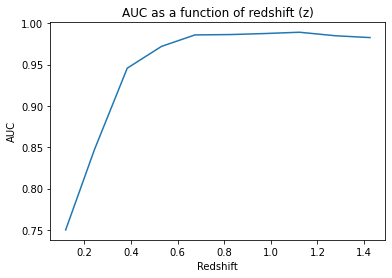

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_auc(target, pred, key, label, num_bins=10, binrange=(0, 1)):
    # Ensure that key is a numpy array of floats
    val = np.asarray(pred_test[key], dtype=float)
    
    bins = np.linspace(binrange[0], binrange[1], num_bins + 1)
    aucs = []
    xvals = []

    for bin_idx in range(num_bins):
        if bin_idx == num_bins - 1:
            cut = (val >= bins[bin_idx]) & (val <= bins[bin_idx + 1])
        else:
            cut = (val > bins[bin_idx]) & (val < bins[bin_idx + 1])


        if np.sum(cut) == 0:
            continue

        try:
            fpr, tpr, thresholds = roc_curve(target[cut], pred[cut], pos_label=1)
            aucs.append(auc(fpr, tpr))
            xvals.append(np.mean(val[cut]))
        except ValueError as e:
            print(f"Skipping bin {bin_idx} due to error: {e}")
            continue

    plt.plot(xvals, aucs, label=label)

# Example usage:
plot_class = 'SNIa'
target = (pred_test['type'] == plot_class).astype(int)  # Ensure target is binary
key = 'redshift'
plot_auc(target, classifications[plot_class], key, 'ParSNIP', binrange=(0, 1.5))

# Set labels and save the figure
plt.xlabel('Redshift')
plt.ylabel('AUC')
plt.title('AUC as a function of redshift (z)')

plt.savefig('./figures/classifier_roc_redshift.pdf')
plt.show()


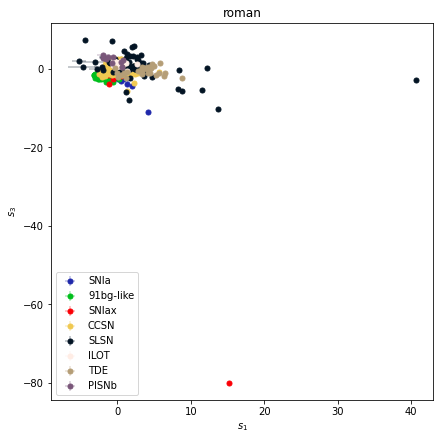

In [15]:
parsnip.plot_representation(pred_train, roman_plot_labels, idx1=1, idx2=3, max_count=200)
plt.title('roman')

plt.savefig('./roman_classification13.pdf')

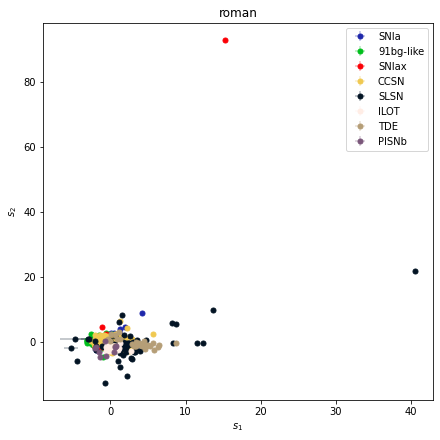

In [14]:
parsnip.plot_representation(pred_train, roman_plot_labels, idx1=1, idx2=2, max_count=200)
plt.title('roman')

plt.savefig('./roman_classification12.pdf')

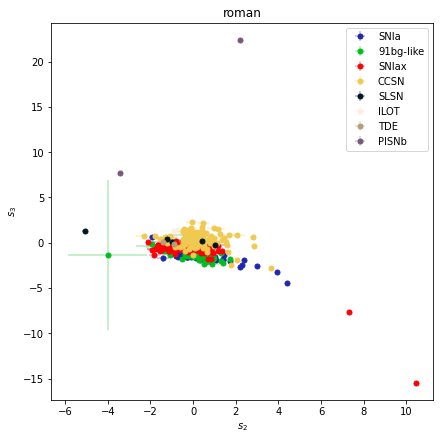

In [12]:
parsnip.plot_representation(preds, roman_plot_labels, idx1=2, idx2=3, max_count=100)
plt.title('roman')

plt.savefig('./roman_classification23.pdf')

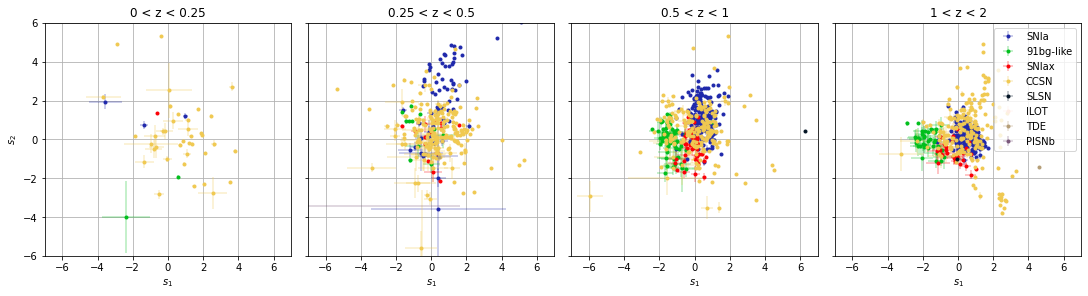

In [13]:
bins = (
    (0, 0.25),
    (0.25, 0.5),
    (0.5, 1),
    (1, 2),
)

fig, axes = plt.subplots(1, 4, figsize=(15, 4), sharex=True, sharey=True,
                         gridspec_kw={'wspace': 0.05, 'hspace': 0.02}, constrained_layout=True)

for idx in range(len(bins)):
    ax = axes[idx]
    min_z, max_z = bins[idx]
    predictions=preds

    mask = (predictions['redshift'] > min_z) & (predictions['redshift'] < max_z)
    use_pred = predictions[mask]
    use_pred.sort('total_s2n', reverse=True)

    kwargs = {}

    if idx == 3:
        kwargs['legend_ncol'] = 1
    else:
        kwargs['show_legend'] = False

    # Common plot
    parsnip.plot_representation(use_pred, roman_plot_labels, idx1=1, idx2=2, max_count=200,
                                markersize=3, ax=ax, **kwargs)
    ax.set_title(f'{min_z} < z < {max_z}')
    ax.set_xlim(-7., 7.)
    ax.set_ylim(-6, 6)
    if idx > 0:
        ax.set_ylabel('')
    ax.grid()
fig.savefig('roman_z_representation12.pdf')

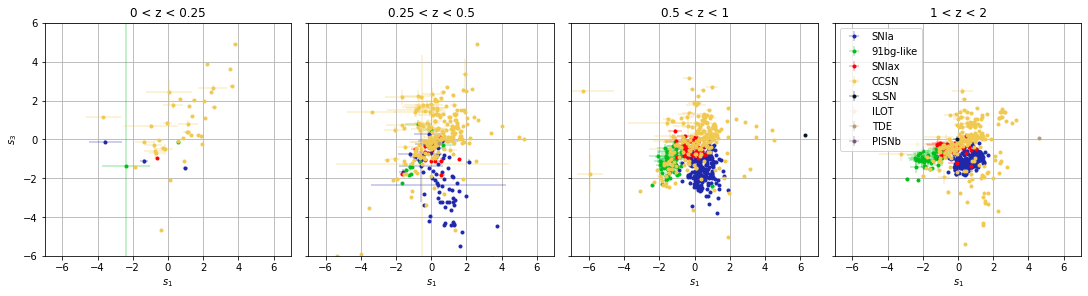

In [14]:
bins = (
    (0, 0.25),
    (0.25, 0.5),
    (0.5, 1),
    (1, 2),
)

fig, axes = plt.subplots(1, 4, figsize=(15, 4), sharex=True, sharey=True,
                         gridspec_kw={'wspace': 0.05, 'hspace': 0.02}, constrained_layout=True)

for idx in range(len(bins)):
    ax = axes[idx]
    min_z, max_z = bins[idx]

    mask = (predictions['redshift'] > min_z) & (predictions['redshift'] < max_z)
    use_pred = predictions[mask]
    use_pred.sort('total_s2n', reverse=True)

    kwargs = {}

    if idx == 3:
        kwargs['legend_ncol'] = 1
    else:
        kwargs['show_legend'] = False

    # Common plot
    parsnip.plot_representation(use_pred, roman_plot_labels, idx1=1, idx2=3, max_count=200,
                                markersize=3, ax=ax, **kwargs)
    ax.set_title(f'{min_z} < z < {max_z}')
    ax.set_xlim(-7., 7.)
    ax.set_ylim(-6, 6)
    if idx > 0:
        ax.set_ylabel('')
    ax.grid()
fig.savefig('roman_z_representation13.pdf')

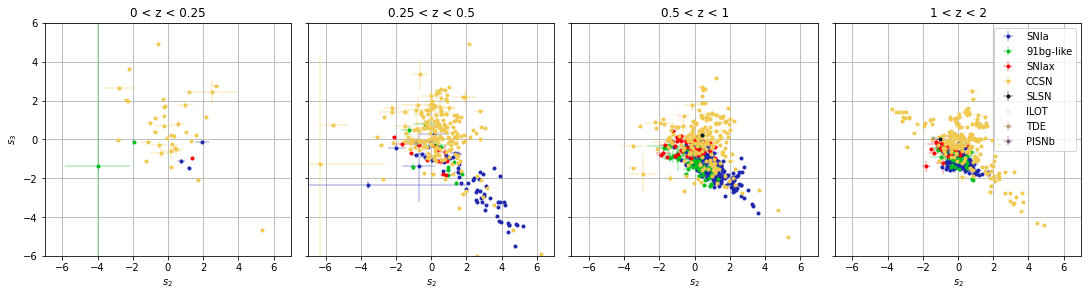

In [15]:
bins = (
    (0, 0.25),
    (0.25, 0.5),
    (0.5, 1),
    (1, 2),
)

fig, axes = plt.subplots(1, 4, figsize=(15, 4), sharex=True, sharey=True,
                         gridspec_kw={'wspace': 0.05, 'hspace': 0.02}, constrained_layout=True)

for idx in range(len(bins)):
    ax = axes[idx]
    min_z, max_z = bins[idx]

    mask = (predictions['redshift'] > min_z) & (predictions['redshift'] < max_z)
    use_pred = predictions[mask]
    use_pred.sort('total_s2n', reverse=True)

    kwargs = {}

    if idx == 3:
        kwargs['legend_ncol'] = 1
    else:
        kwargs['show_legend'] = False

    # Common plot
    parsnip.plot_representation(use_pred, roman_plot_labels, idx1=2, idx2=3, max_count=200,
                                markersize=3, ax=ax, **kwargs)
    ax.set_title(f'{min_z} < z < {max_z}')
    ax.set_xlim(-7., 7.)
    ax.set_ylim(-6, 6)
    if idx > 0:
        ax.set_ylabel('')
    ax.grid()
fig.savefig('roman_z_representation23.pdf')